In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img, img_to_array
import tensorflow_datasets as tfds
import os
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True )

training_Set = train_datagen.flow_from_directory("dataimg/train",target_size=(160,160),batch_size=16,class_mode = 'categorical') 

Found 8478 images belonging to 150 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_Set = test_datagen.flow_from_directory(
        'dataimg/val',
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

Found 2190 images belonging to 150 classes.


In [10]:
base_model = tf.keras.applications.mobilenet.MobileNet(weights = "imagenet", include_top = False)

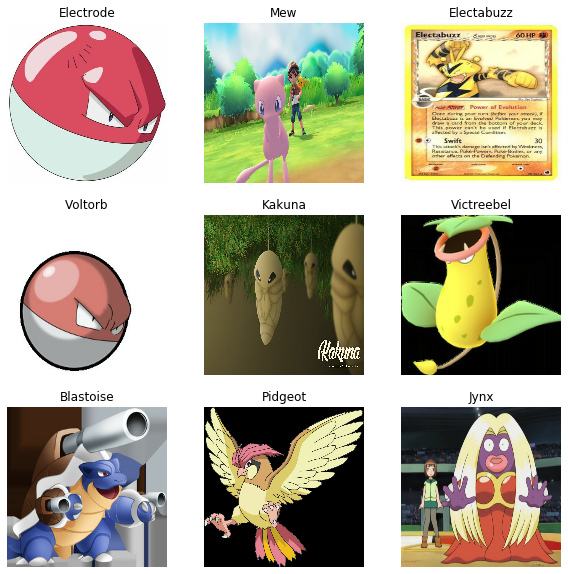

In [4]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


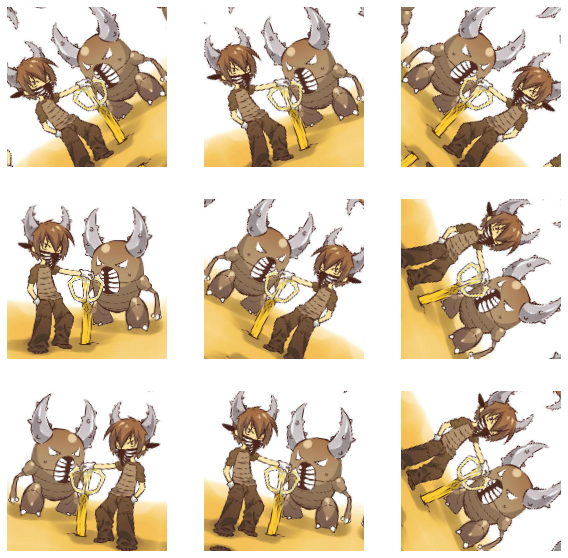

In [9]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [11]:
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(150,activation = "softmax")(avg)
model = tf.keras.Model(inputs = base_model.input,outputs = output)
for layer in base_model.layers:
    layer.trainable = False

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,name='SGD')
model.compile(loss = 'categorical_crossentropy',optimizer=optimizer,metrics=["accuracy"])
hist = model.fit(training_Set,epochs = 15,validation_data= test_Set)

Epoch 1/15
 39/530 [=>............................] - ETA: 1:17:48 - loss: 5.9537 - accuracy: 0.0000e+0 - ETA: 2:26 - loss: 5.5615 - accuracy: 0.0000e+00  - ETA: 2:49 - loss: 5.8976 - accuracy: 0.0000e+ - ETA: 3:30 - loss: 5.9819 - accuracy: 0.0000e+ - ETA: 3:49 - loss: 5.9094 - accuracy: 0.0000e+ - ETA: 3:55 - loss: 5.9144 - accuracy: 0.0179   - ETA: 3:52 - loss: 6.0469 - accuracy: 0.01 - ETA: 3:49 - loss: 5.9880 - accuracy: 0.01 - ETA: 3:49 - loss: 5.9862 - accuracy: 0.01 - ETA: 3:45 - loss: 6.0559 - accuracy: 0.02 - ETA: 3:45 - loss: 6.0882 - accuracy: 0.03 - ETA: 3:45 - loss: 6.0256 - accuracy: 0.03 - ETA: 3:45 - loss: 6.0073 - accuracy: 0.03 - ETA: 3:45 - loss: 5.9652 - accuracy: 0.04 - ETA: 3:51 - loss: 5.9562 - accuracy: 0.03 - ETA: 3:47 - loss: 5.8816 - accuracy: 0.04 - ETA: 3:49 - loss: 5.9102 - accuracy: 0.04 - ETA: 3:45 - loss: 5.9050 - accuracy: 0.04 - ETA: 3:43 - loss: 5.8452 - accuracy: 0.04 - ETA: 3:42 - loss: 5.8912 - accuracy: 0.04 - ETA: 3:42 - loss: 5.8544 - accuracy

E:\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


225/530 [===========>..................] - ETA: 3:36 - loss: 5.7571 - accuracy: 0.06 - ETA: 3:35 - loss: 5.7449 - accuracy: 0.06 - ETA: 3:35 - loss: 5.7254 - accuracy: 0.06 - ETA: 3:34 - loss: 5.7168 - accuracy: 0.07 - ETA: 3:33 - loss: 5.6951 - accuracy: 0.07 - ETA: 3:31 - loss: 5.6943 - accuracy: 0.07 - ETA: 3:31 - loss: 5.6852 - accuracy: 0.07 - ETA: 3:32 - loss: 5.6753 - accuracy: 0.07 - ETA: 3:33 - loss: 5.6330 - accuracy: 0.08 - ETA: 3:34 - loss: 5.6293 - accuracy: 0.08 - ETA: 3:34 - loss: 5.6102 - accuracy: 0.08 - ETA: 3:34 - loss: 5.6096 - accuracy: 0.08 - ETA: 3:33 - loss: 5.6056 - accuracy: 0.08 - ETA: 3:32 - loss: 5.5870 - accuracy: 0.08 - ETA: 3:33 - loss: 5.5617 - accuracy: 0.08 - ETA: 3:32 - loss: 5.5588 - accuracy: 0.08 - ETA: 3:32 - loss: 5.5710 - accuracy: 0.08 - ETA: 3:31 - loss: 5.5540 - accuracy: 0.08 - ETA: 3:31 - loss: 5.5333 - accuracy: 0.08 - ETA: 3:31 - loss: 5.5193 - accuracy: 0.08 - ETA: 3:30 - loss: 5.5281 - accuracy: 0.08 - ETA: 3:31 - loss: 5.5137 - accura

In [13]:
for layer in base_model.layers:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,name='SGD')
model.compile(loss = 'categorical_crossentropy',optimizer=optimizer,metrics=["accuracy"])
hist = model.fit(training_Set,epochs = 15,validation_data= test_Set)

Epoch 1/15
185/530 [=========>....................] - ETA: 1:05:26 - loss: 2.4065 - accuracy: 0.625 - ETA: 33s - loss: 1.7463 - accuracy: 0.6875    - ETA: 57s - loss: 2.3164 - accuracy: 0.583 - ETA: 1:13 - loss: 2.3463 - accuracy: 0.57 - ETA: 1:14 - loss: 2.2410 - accuracy: 0.58 - ETA: 1:59 - loss: 2.0750 - accuracy: 0.60 - ETA: 1:44 - loss: 2.0639 - accuracy: 0.60 - ETA: 1:43 - loss: 1.9336 - accuracy: 0.61 - ETA: 1:38 - loss: 1.9446 - accuracy: 0.59 - ETA: 1:35 - loss: 1.9096 - accuracy: 0.60 - ETA: 1:31 - loss: 1.8857 - accuracy: 0.60 - ETA: 1:28 - loss: 1.9201 - accuracy: 0.60 - ETA: 1:28 - loss: 1.9327 - accuracy: 0.60 - ETA: 1:26 - loss: 1.9508 - accuracy: 0.59 - ETA: 1:25 - loss: 1.9881 - accuracy: 0.59 - ETA: 1:26 - loss: 1.9321 - accuracy: 0.59 - ETA: 1:25 - loss: 1.9159 - accuracy: 0.59 - ETA: 1:24 - loss: 1.8733 - accuracy: 0.60 - ETA: 1:25 - loss: 1.8704 - accuracy: 0.59 - ETA: 1:25 - loss: 1.8539 - accuracy: 0.59 - ETA: 1:24 - loss: 1.8159 - accuracy: 0.60 - ETA: 1:25 - lo

# freezing layers

# we get better accuracy after unfreezing layers as right now model is more probabilty oriented than feature oriented

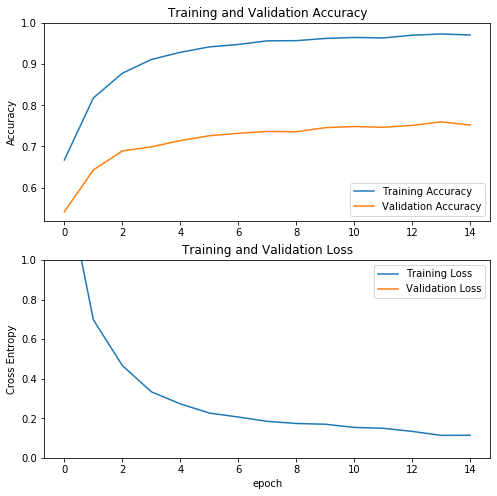

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# Final predictions

In [31]:
PATH = 'dataimg/train'
PATH1 = 'test_img'
classes = os.listdir(PATH)
class1 = os.listdir(PATH1)

In [32]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_Set1 = test_datagen1.flow_from_directory(
        PATH1,
        target_size=(160, 160),
        batch_size=16,
        class_mode='categorical')

Found 8 images belonging to 7 classes.


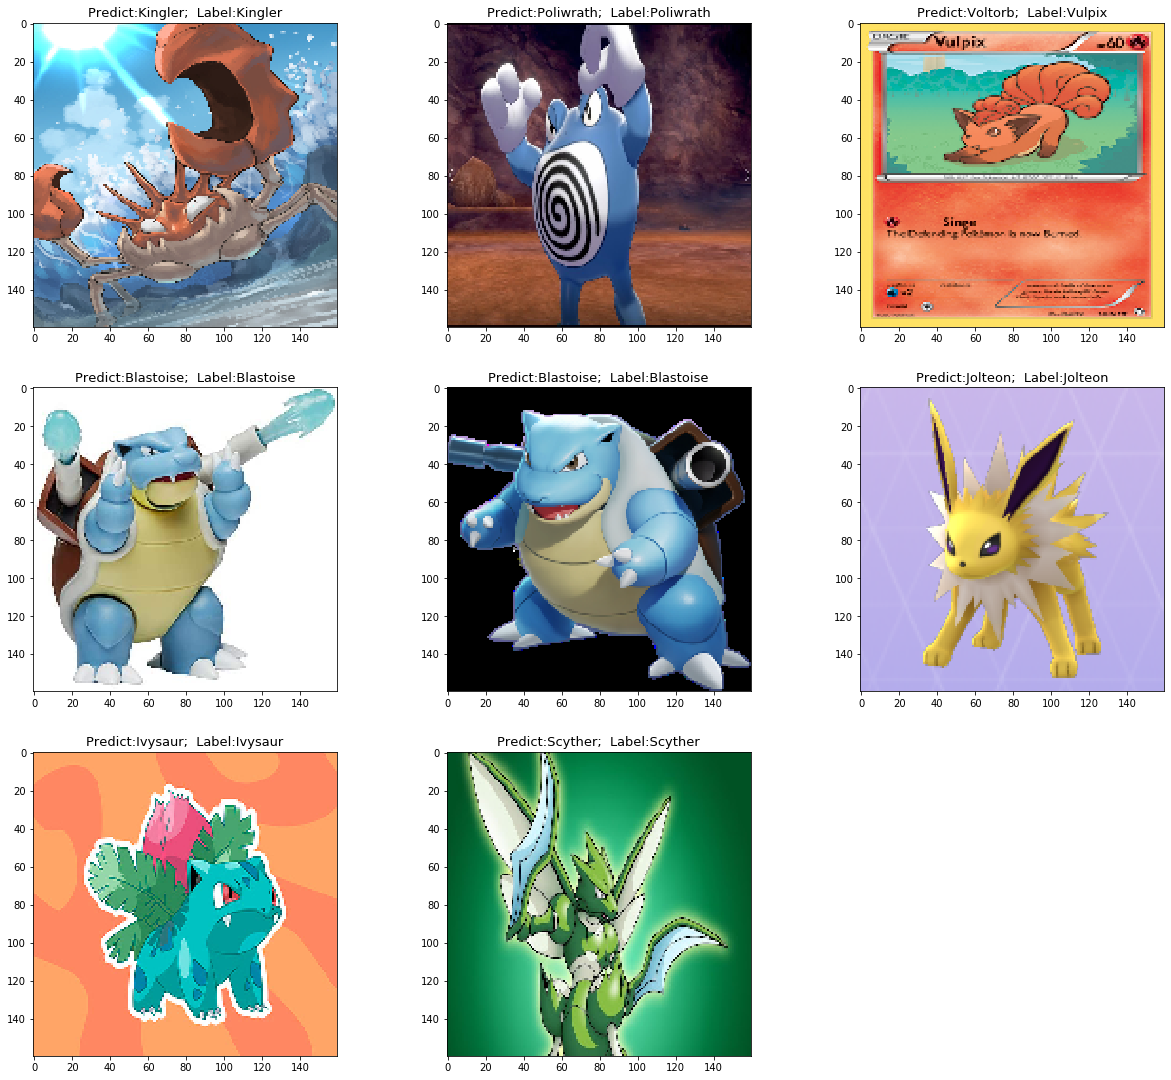

In [33]:
plt.figure(figsize=(21,19))
t_x,t_y = next(test_Set1) 
pred_ = model.predict(t_x)
for i in range(len(t_x)):
    pred,y = pred_[i].argmax(), t_y[i].argmax()
    plt.subplot(3,3,i+1)
    plt.imshow(t_x[i])
    title_ = 'Predict:' + str(classes[pred])+ ';  Label:' + str(class1[y])
    plt.title(title_,size = 13)
plt.show()

In [34]:
model.save('poke_mobinet.h5')